In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [37]:
url="https://raw.githubusercontent.com/gunjan975/Design-matrix-/refs/heads/main/data.csv"
df=pd.read_csv(url)


In [38]:
input_columns = [
    'Background Voltage (V)',
    'Pulse Voltage (V)',
    'Pulse Frequency (Hz)',
    'Pulse Duty Factor',
    'Wire Feed Rate (m/min)',
    'Table Feed Rate (mm/s)',
    'RMS Current (A)',
    'RMS Voltage (V)'
]
output_column = 'UTS (MPa)'


In [39]:
X = df[input_columns].values
y = df[output_column].values.reshape(-1, 1)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

In [41]:
("X after normalization:\n", X_scaled)

('X after normalization:\n',
 array([[0.7       , 0.18110749, 1.        , 1.        , 0.66666667,
         0.38088235, 0.10280374, 1.        ],
        [0.7       , 0.18110749, 1.        , 1.        , 0.66666667,
         0.38088235, 0.10280374, 1.        ],
        [0.4       , 0.        , 0.        , 0.        , 0.33333333,
         1.        , 1.        , 0.88231631],
        [0.4       , 0.        , 0.        , 0.        , 0.33333333,
         1.        , 1.        , 0.88231631],
        [0.4       , 0.        , 0.        , 0.        , 0.33333333,
         1.        , 1.        , 0.88231631],
        [0.        , 1.        , 0.48979592, 1.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 1.        , 0.48979592, 1.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 1.        , 0.48979592, 1.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.7       , 0.18110749, 1.        , 1.    

In [42]:
("y after normalization:\n", y_scaled)

('y after normalization:\n',
 array([[0.54540901],
        [0.56299153],
        [0.12678455],
        [0.41837399],
        [0.27360617],
        [0.        ],
        [0.15608876],
        [0.10193859],
        [0.54540901],
        [0.56299153],
        [0.54540901],
        [0.57561489],
        [0.73526023],
        [1.        ],
        [0.9938386 ],
        [0.82517658],
        [0.        ],
        [0.15608876],
        [0.79311727],
        [0.79071282],
        [0.53924761],
        [0.57922156],
        [0.57932175],
        [0.56955367],
        [0.56920303],
        [0.50723839],
        [0.48414567],
        [0.58893954],
        [0.59845715],
        [0.52447027],
        [0.49877273],
        [0.57922156],
        [0.57932175],
        [0.56955367],
        [0.56920303],
        [0.50723839],
        [0.48414567],
        [0.79311727],
        [0.79071282],
        [0.53924761],
        [0.        ],
        [0.15608876],
        [0.10193859],
        [0.54540901],
   

In [43]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [50]:
learning_rates = [0.0008,0.0001,0.0005]
epochs = 10000

for lr in learning_rates:
    print(f"\n=== With Learning Rate: {lr} ===")
    
    weights = np.full((X.shape[1],), 0.1)
    bias = 0.0
    losses = []
    
    for epoch in range(1, epochs + 1):
        total_loss = 0

        for i in range(len(X)):
            x_i = X[i]
            y_true = y[i][0]

            
            y_pred = np.dot(weights, x_i) + bias

            # MSE loss
            loss = (y_pred - y_true) ** 2
            total_loss += loss

            
            dz = 2 * (y_pred - y_true)
            dw = dz * x_i
            db = dz

            
            weights -= lr * dw
            bias -= lr * db

        avg_loss = total_loss / len(X)
        losses.append(avg_loss)

        if epoch % 500 == 0:
            print(f"Epoch {epoch} | Avg MSE Loss = {avg_loss}")

    y_pred_norm=np.dot(X,weights)+bias
    y_pred_actual=scaler_y.inverse_transform(y_pred_norm.reshape(-1,1))
    y_actual = scaler_y.inverse_transform(y)
    
percent_error = np.mean(np.abs((y_actual - y_pred_actual) / (y_actual+1e-9))) * 100
print(f"Final % Error for LR={lr:.4f}")



=== With Learning Rate: 0.0008 ===
Epoch 500 | Avg MSE Loss = 0.009051812889288191
Epoch 1000 | Avg MSE Loss = 0.008368967647020303
Epoch 1500 | Avg MSE Loss = 0.007961111003222308
Epoch 2000 | Avg MSE Loss = 0.007708262044581394
Epoch 2500 | Avg MSE Loss = 0.007548241534870181
Epoch 3000 | Avg MSE Loss = 0.007445740575262832
Epoch 3500 | Avg MSE Loss = 0.007379549045151662
Epoch 4000 | Avg MSE Loss = 0.007336507503566176
Epoch 4500 | Avg MSE Loss = 0.0073083078465795166
Epoch 5000 | Avg MSE Loss = 0.007289656671573775
Epoch 5500 | Avg MSE Loss = 0.007277165012931245
Epoch 6000 | Avg MSE Loss = 0.007268657241687686
Epoch 6500 | Avg MSE Loss = 0.007262734154960729
Epoch 7000 | Avg MSE Loss = 0.007258494564511214
Epoch 7500 | Avg MSE Loss = 0.007255357173272604
Epoch 8000 | Avg MSE Loss = 0.007252946378412921
Epoch 8500 | Avg MSE Loss = 0.007251018972710058
Epoch 9000 | Avg MSE Loss = 0.007249417059387096
Epoch 9500 | Avg MSE Loss = 0.007248037784582756
Epoch 10000 | Avg MSE Loss = 0.00

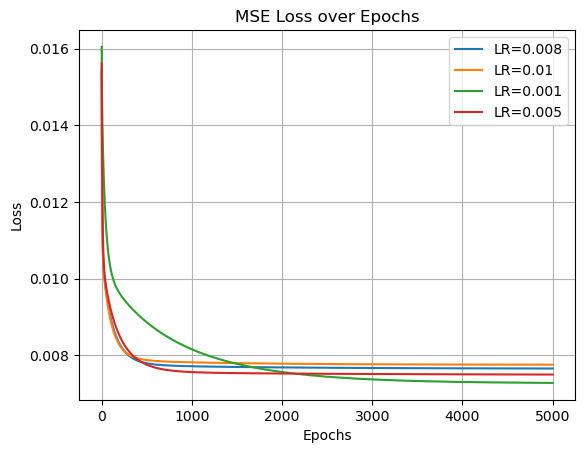

In [51]:
for lr in losses_all:
    plt.plot(losses_all[lr], label=f"LR={lr}")
plt.title("MSE Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

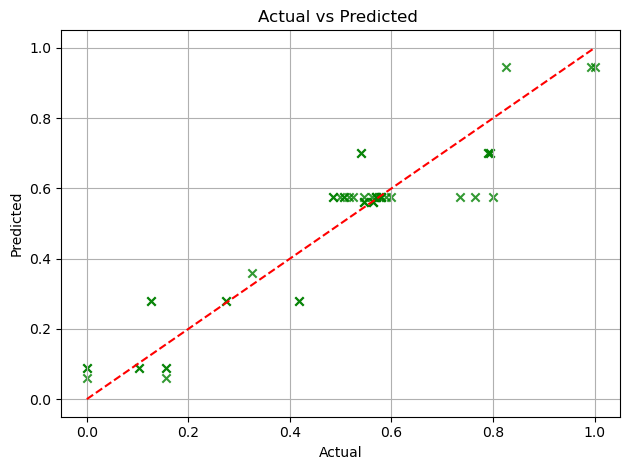

In [56]:
plt.scatter(y_actual, y_pred_actual, color='green', marker='x', alpha=0.8)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'r--')
plt.title("Actual vs Predicted ")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()